In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\advertising.csv')

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 5)

# EDA

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
df.shape

(200, 4)

In [9]:
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [10]:
# it regression problem

In [11]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [12]:
# all numerical values so no encoding

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
# no null values proceed data set

In [16]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
# data visluzation

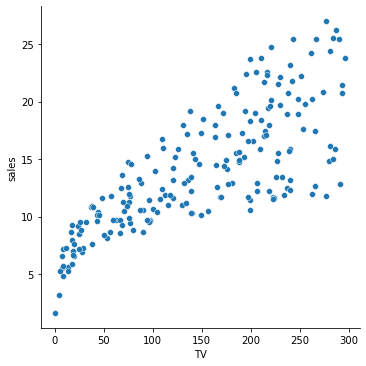

In [18]:
sns.relplot(data=df,x='TV',y='sales',)
plt.show()

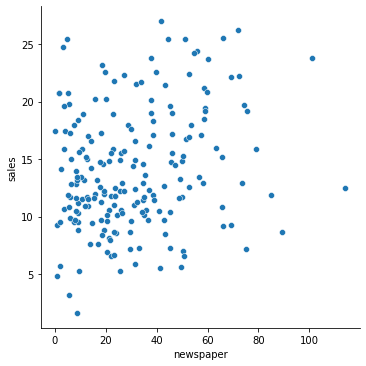

In [19]:
sns.relplot(data=df,x='newspaper',y='sales')
plt.show()

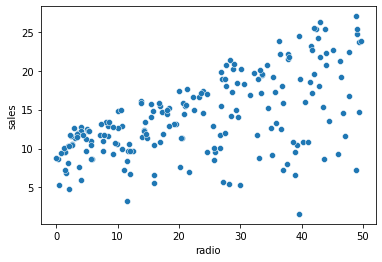

In [20]:
sns.scatterplot(data=df,x='radio',y='sales')
plt.show()


In [21]:
# some rel plot used in good reltion ship is tv, radio increase sales

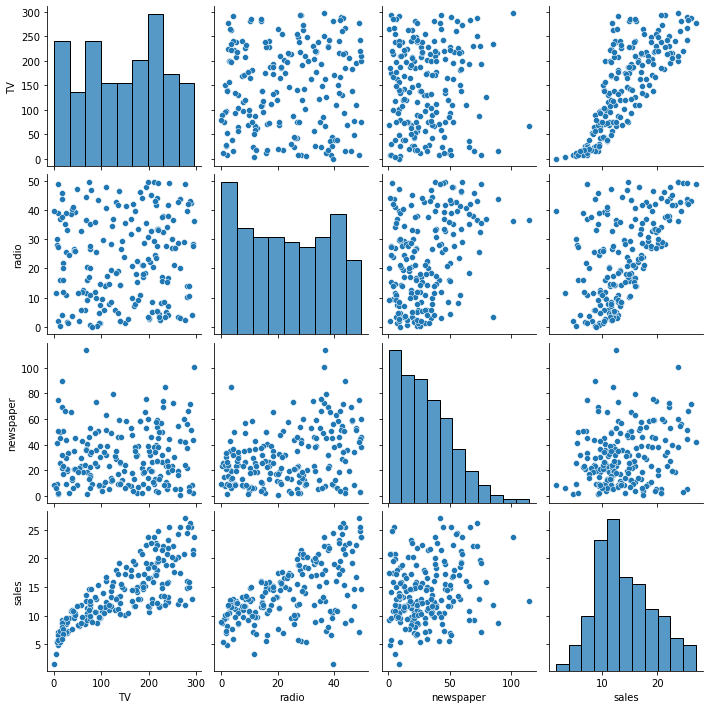

In [22]:
sns.pairplot(df)

<AxesSubplot:>

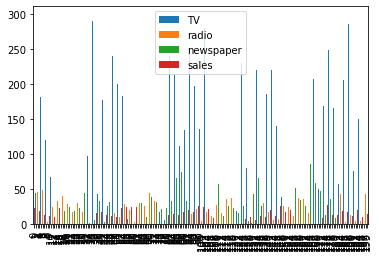

In [23]:
df.plot.bar()

[]

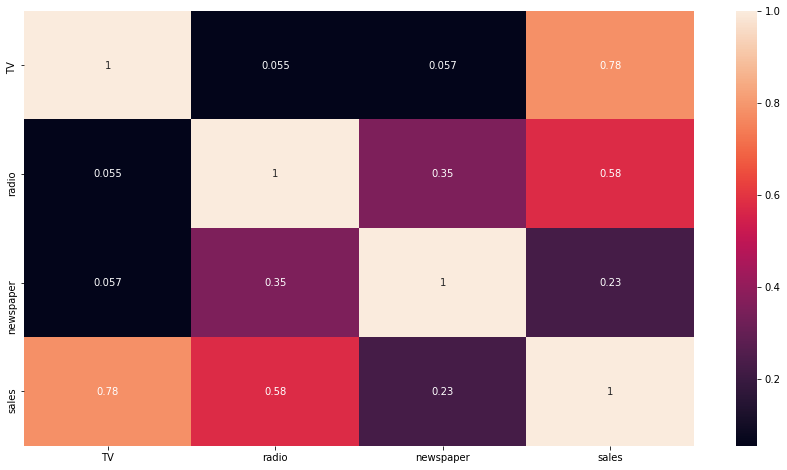

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.plot()

In [25]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


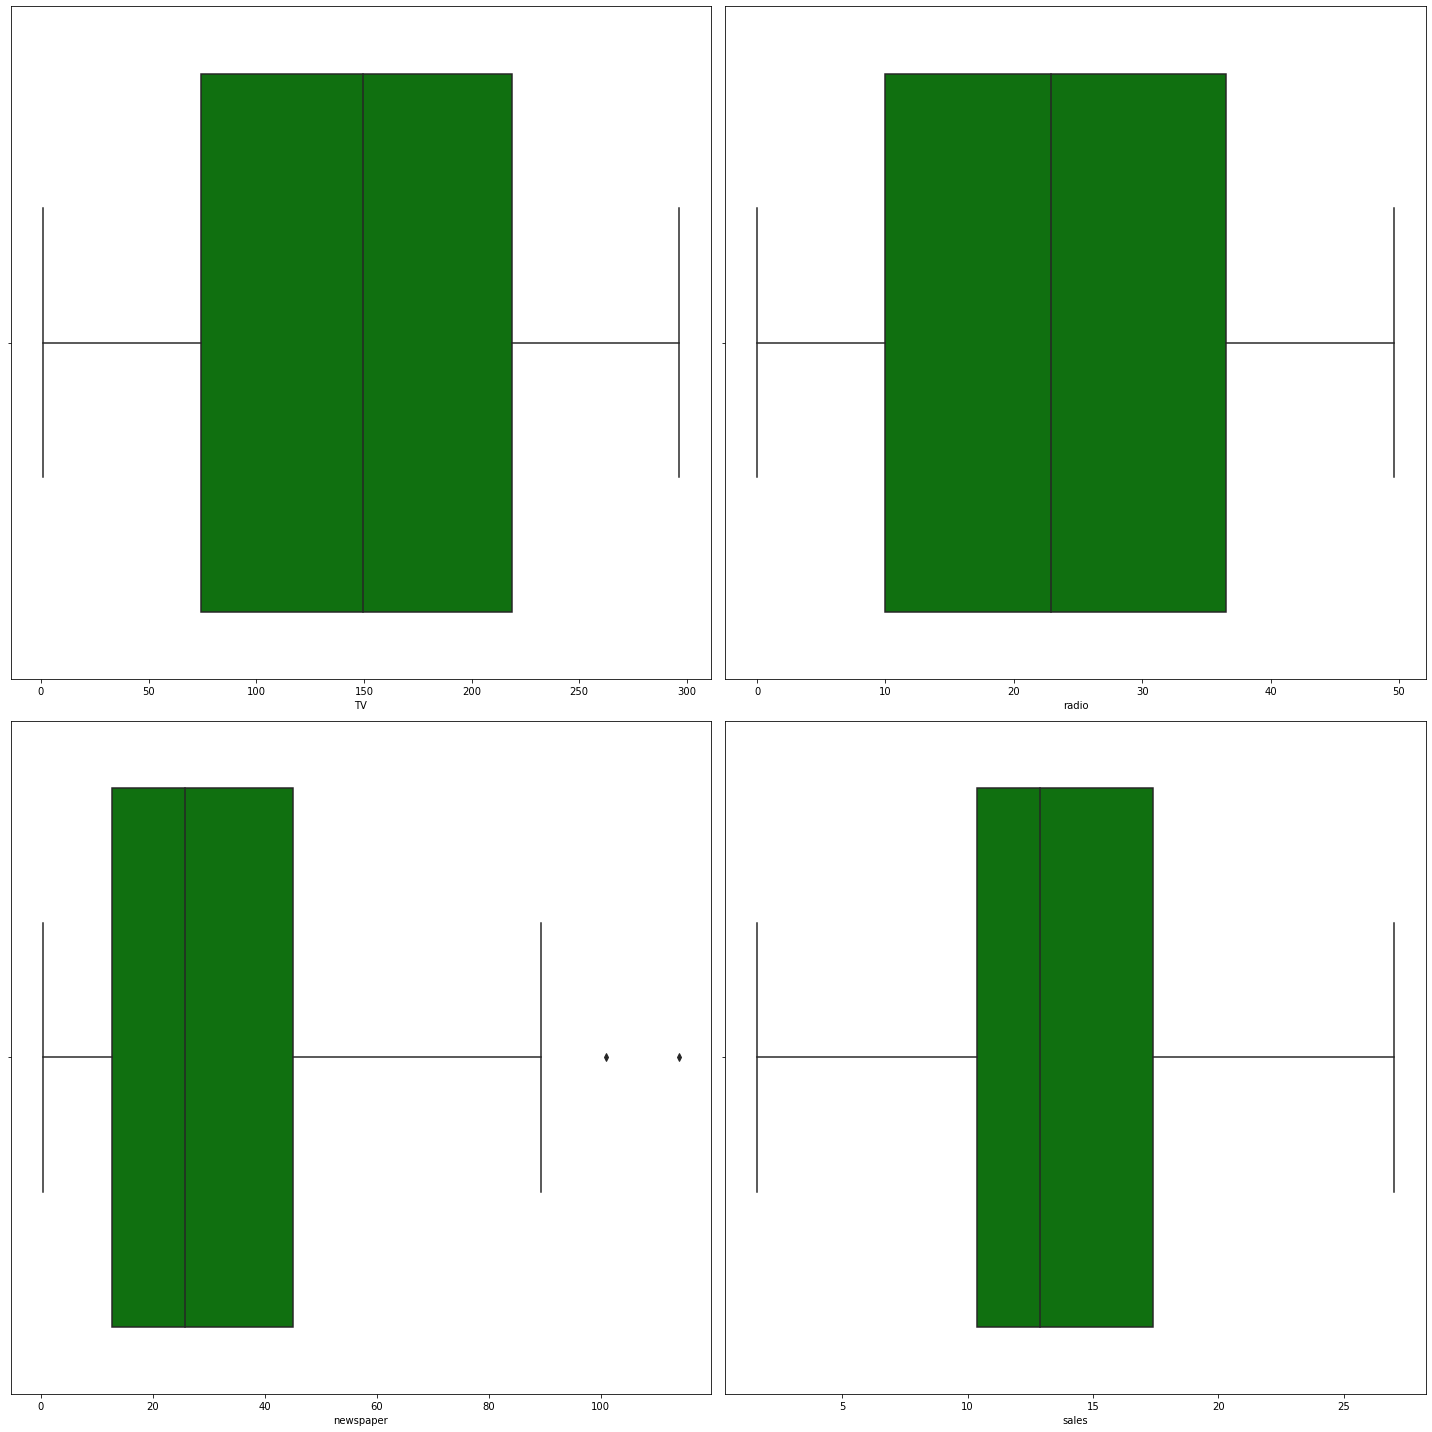

In [26]:
collist=df.columns.values
ncol=2
nrows=2
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

In [27]:
#newspaper are some outliers there 

In [28]:
#so remove outliers iqr method

In [29]:
df.shape

(200, 4)

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
df_new.shape

(198, 4)

In [32]:
data_loss=((200-198)/200)*100

In [33]:
data_loss = 101

In [34]:
x = df.drop(columns=['sales'],axis=1)
y = df['sales']

In [35]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [36]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [37]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [38]:
df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

In [39]:
# skewness removed so data cleaning complete so proceed ml algothims

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [41]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.29,random_state=38)

In [43]:
lr = LinearRegression()
kn = KNeighborsRegressor()
sv = SVR()

In [44]:
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(lr,x,y,cv=5).mean())

r2 score 0.8950650475776626
1.1026836011919816
2.085417165749985
0.8871063495438436


In [45]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(kn,x,y,cv=5).mean())

r2 score 0.9555160639846016
0.6968965517241383
0.8840482758620698
0.9085710686189529


In [46]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(sv,x,y,cv=5).mean())

r2 score 0.9616850597069632
0.5617986324120162
0.7614491868276301
0.8404415171122854


In [47]:
#so highest accuracy svm

In [48]:
#accuracy-cv model best is linear regression

In [49]:
#hyper parameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters = {'fit_intercept':[True, False],
"normalize":[True, False],
"copy_X":[True, False]
}

cvInstance = GridSearchCV(LinearRegression(),param_grid = parameters, cv = 5, scoring = 'r2')
cvInstance.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [59]:
cvInstance.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [60]:
Final_mod = LinearRegression(copy_X=True,fit_intercept=True,normalize=True)
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

89.50650475776627


In [61]:
# save the model

In [ ]:
import job